In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-data/train.csv
/kaggle/input/mnist-data/test.csv


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

In [3]:
# Load the data
train_df = pd.read_csv('/kaggle/input/mnist-data/train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-data/test.csv')


X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.values

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), steps_per_epoch=X_val.shape[0] // 64,
                              callbacks = [reduce_lr])


Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 37s 247ms/step - accuracy: 0.7334 - loss: 0.9908 - val_accuracy: 0.1082 - val_loss: 7.9404 - learning_rate: 0.0010
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.9415 - loss: 0.2109 - val_accuracy: 0.1082 - val_loss: 10.1545 - learning_rate: 9.0000e-04
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 246ms/step - accuracy: 0.9562 - loss: 0.1452 - val_accuracy: 0.5360 - val_loss: 1.8185 - learning_rate: 8.1000e-04
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.9682 - loss: 0.1231 - val_accuracy: 0.9543 - val_loss: 0.1521 - learning_rate: 7.2900e-04
Epoch 5/100
  1/131 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.9531 - loss: 0.1493

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4802 - loss: 0.0752 - val_accuracy: 0.9554 - val_loss: 0.1490 - learning_rate: 6.5610e-04
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 243ms/step - accuracy: 0.9737 - loss: 0.0800 - val_accuracy: 0.9777 - val_loss: 0.0719 - learning_rate: 5.9049e-04
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 243ms/step - accuracy: 0.9776 - loss: 0.0800 - val_accuracy: 0.9867 - val_loss: 0.0416 - learning_rate: 5.3144e-04
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.9743 - loss: 0.0952 - val_accuracy: 0.9873 - val_loss: 0.0406 - learning_rate: 4.7830e-04
Epoch 9/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 244ms/step - accuracy: 0.9776 - loss: 0.0672 - val_accuracy: 0.9867 - val_loss: 0.0421 - learning_rate: 4.3047e-04
Epoch 10/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4881 - loss: 0.0250 - val_accuracy: 0.9869 - val_loss: 0.0426 - learning_rate: 3.8742e-04
Epoch 11/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/ste

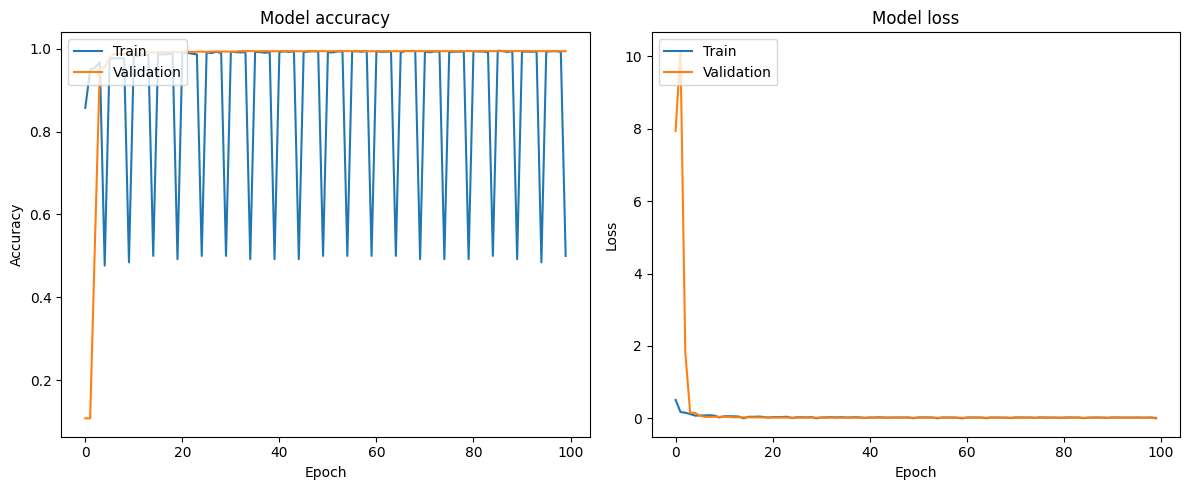

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [8]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step


In [9]:
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(y_pred_classes) + 1),
    'Label': y_pred_classes
})

submission_df.to_csv('submission4.csv', index=False)
